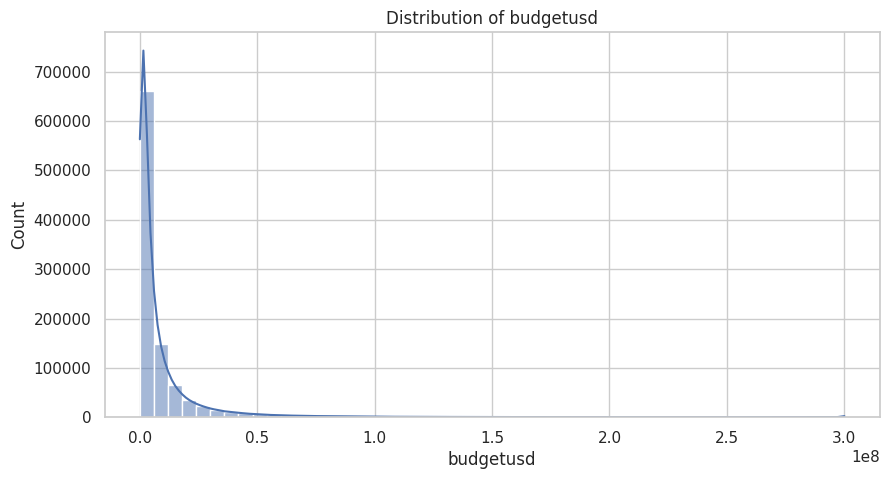

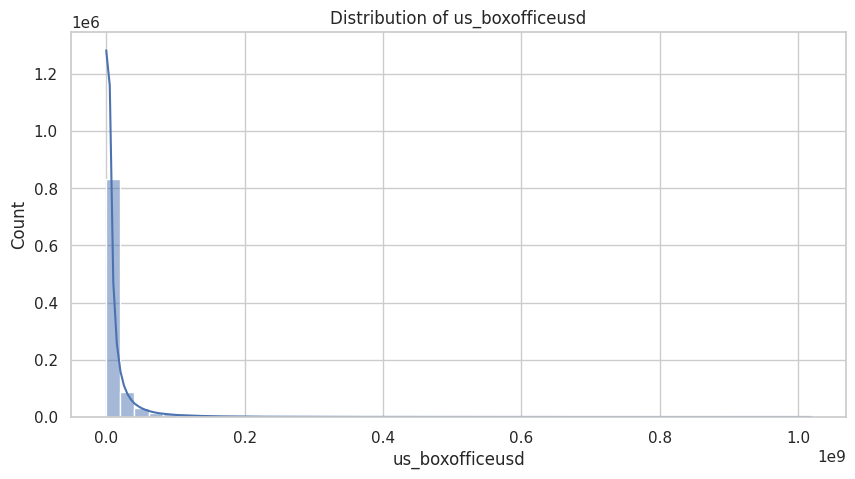

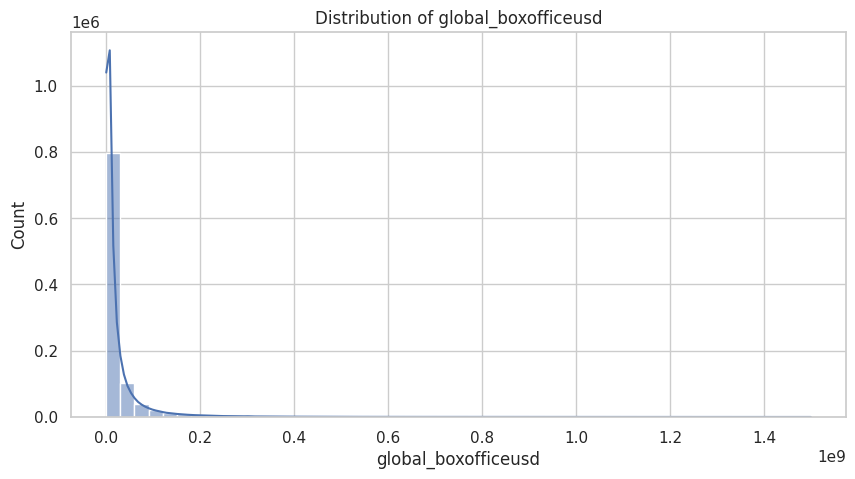

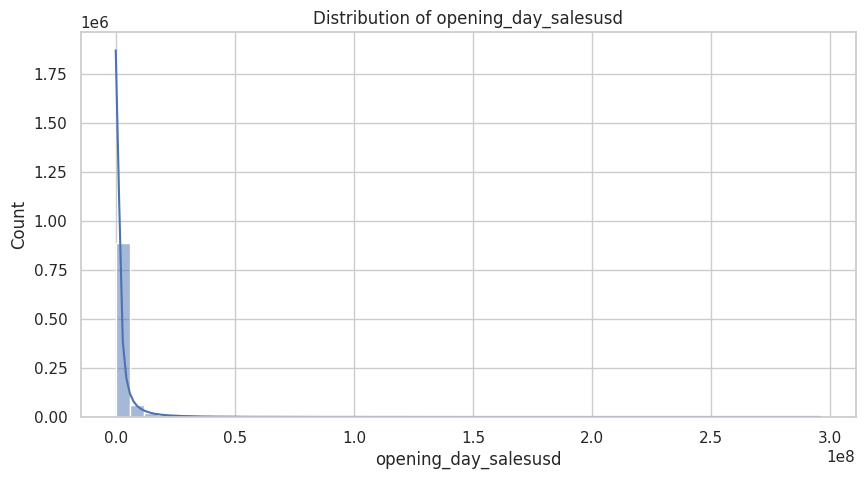

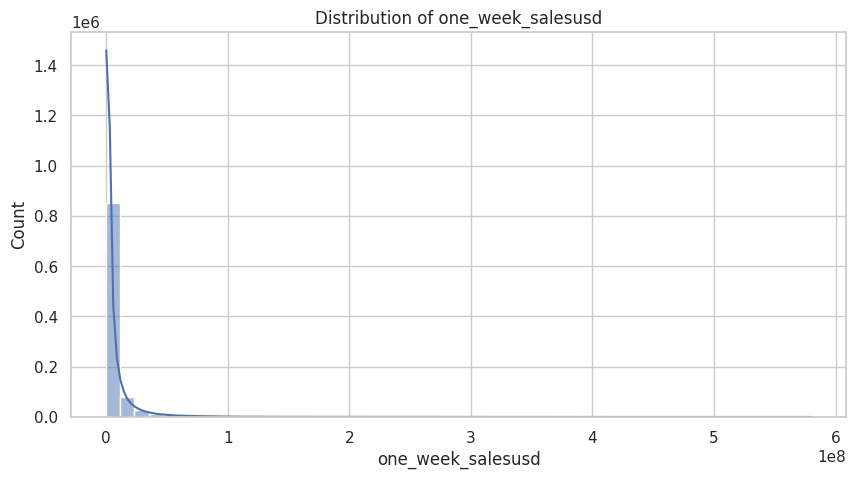

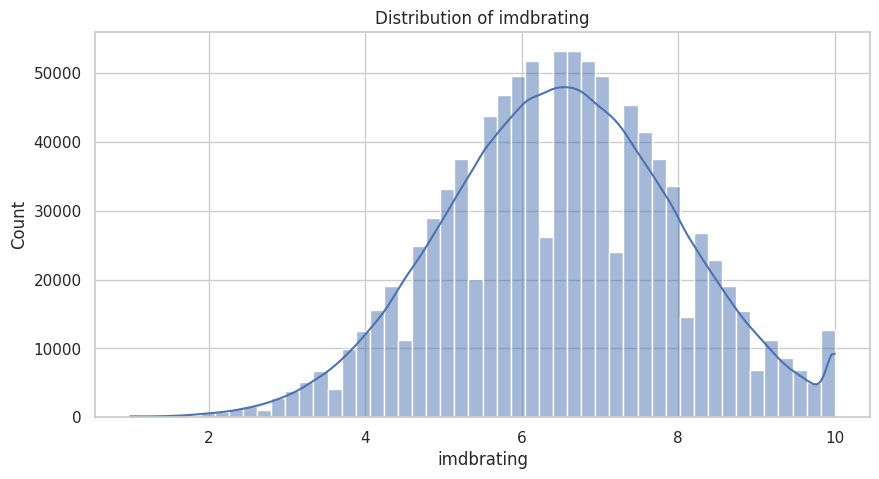

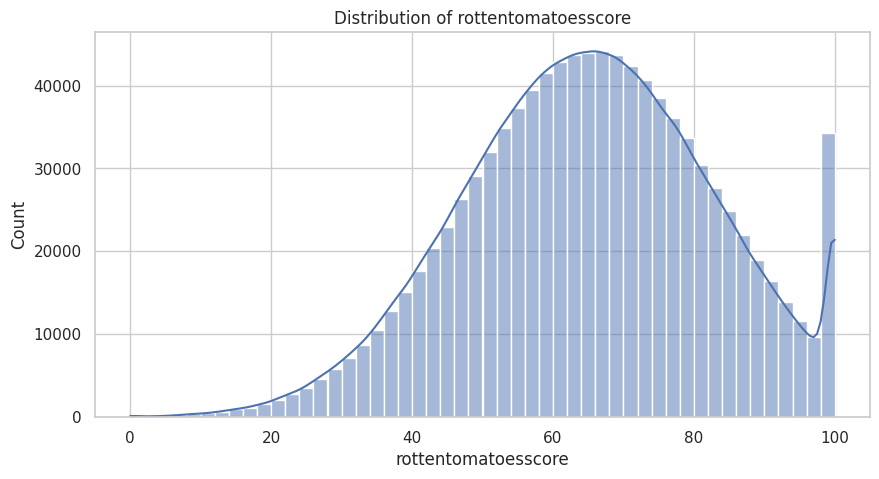

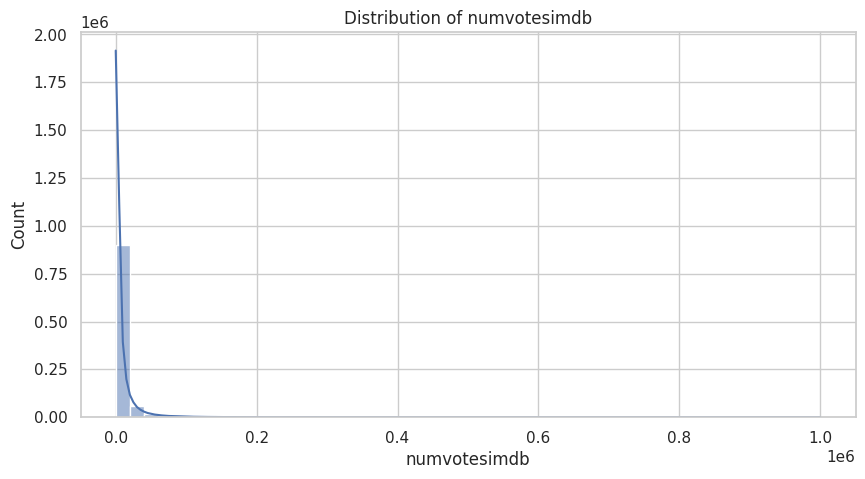

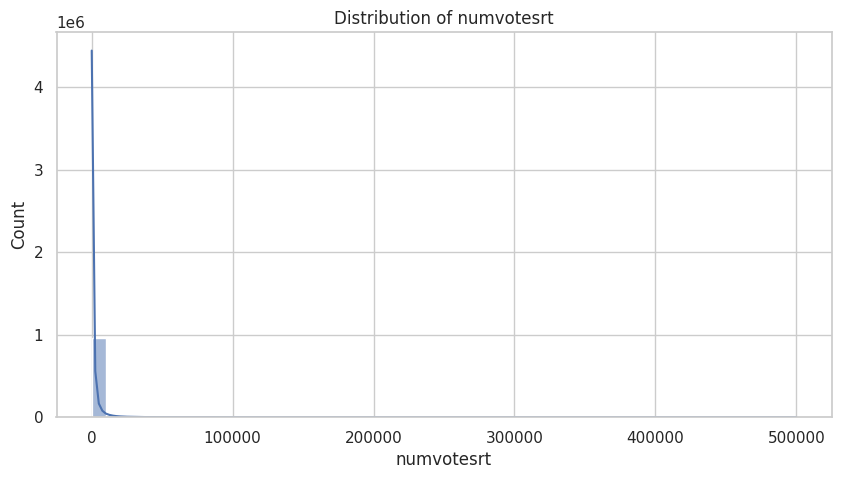

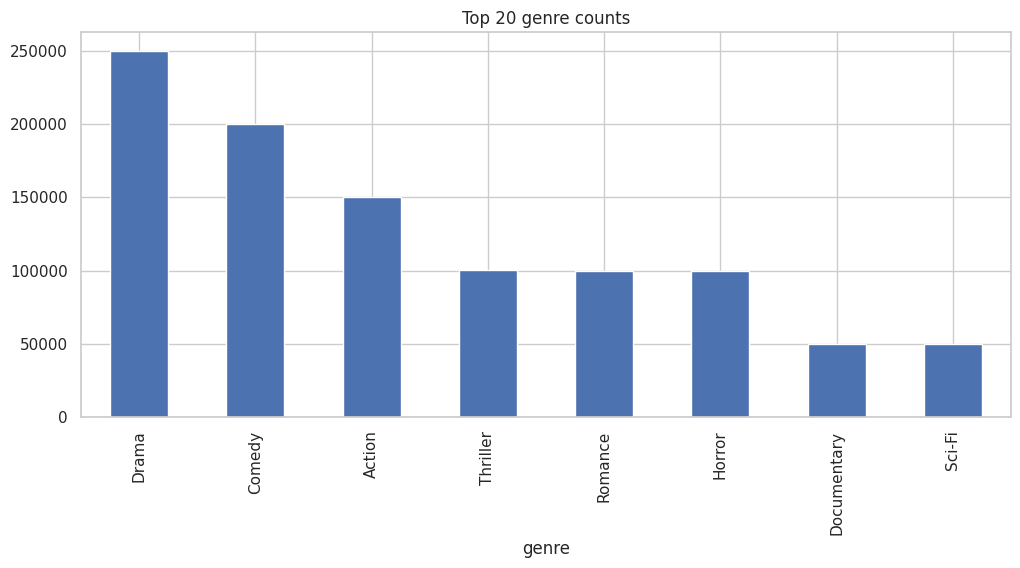

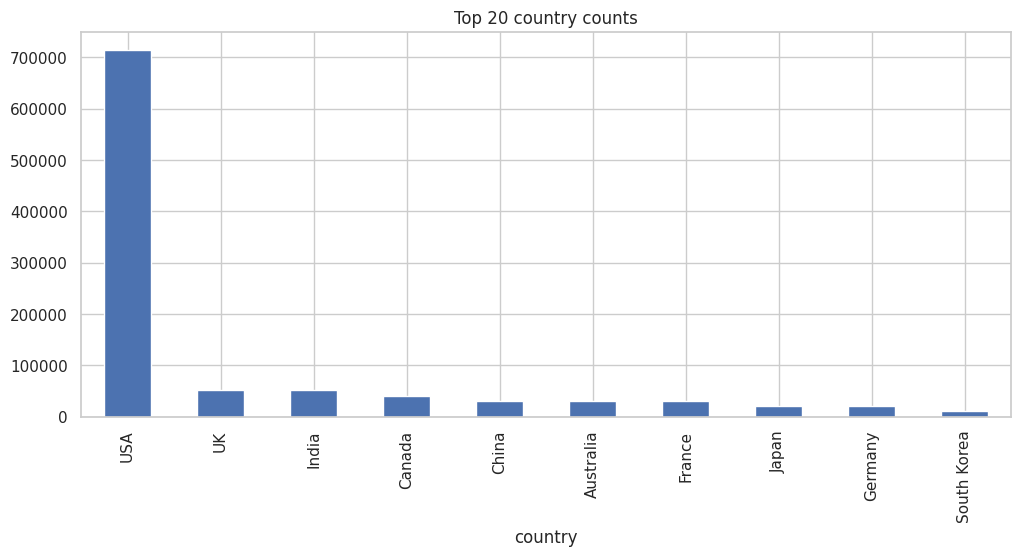

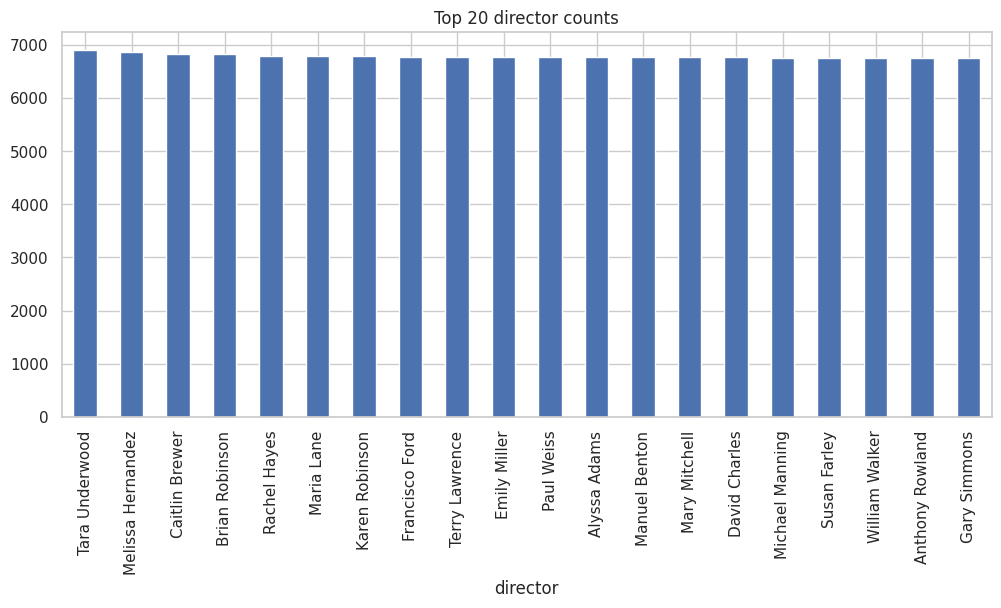

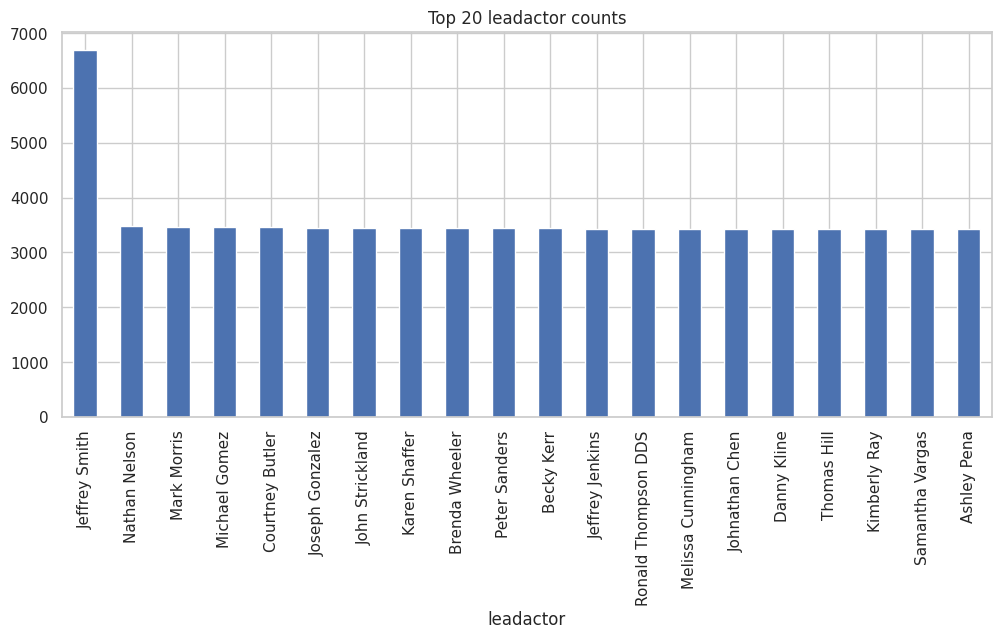

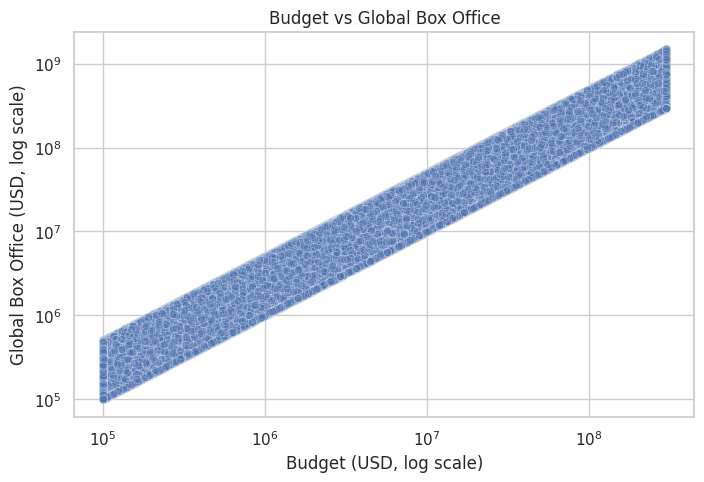

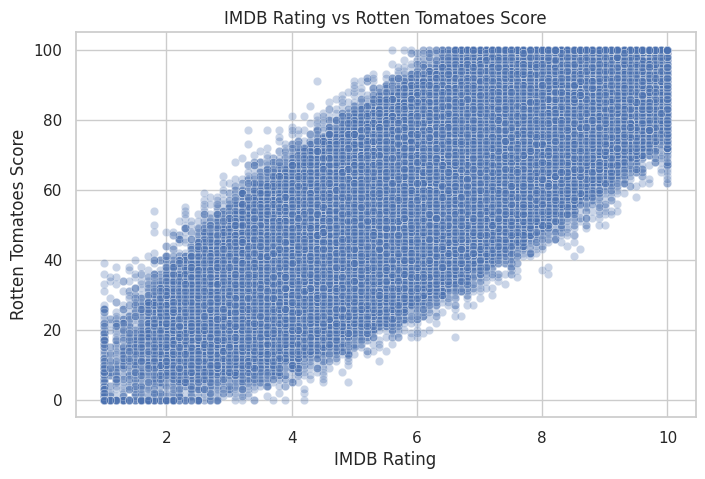

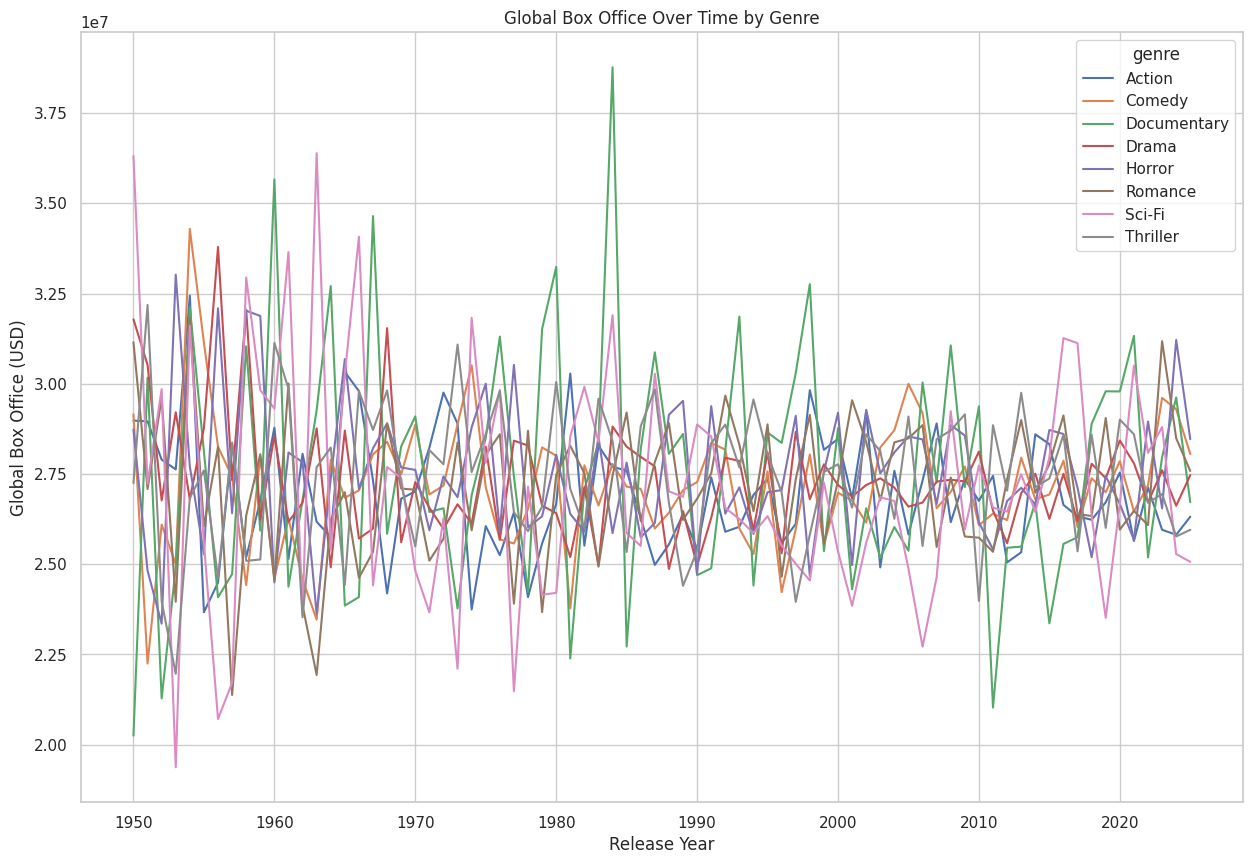

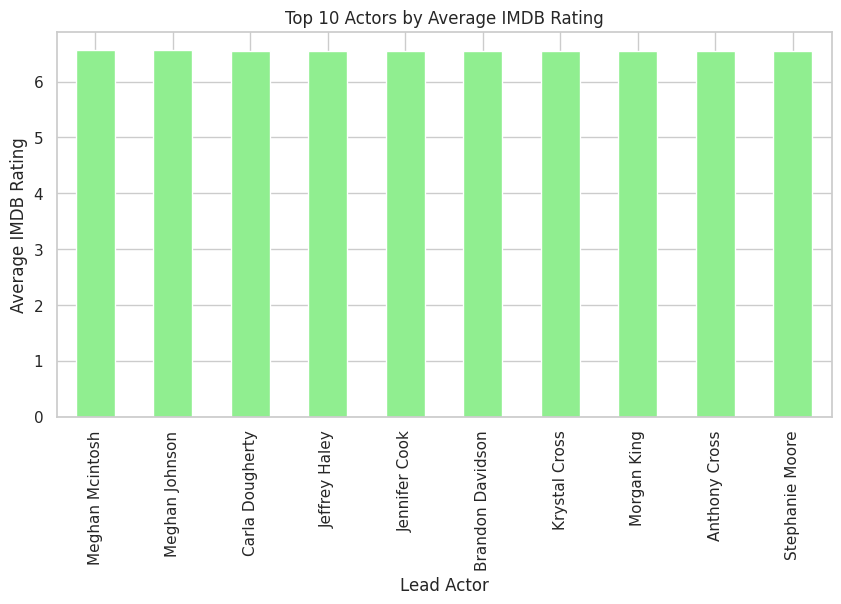

In [7]:
# ==============================
# MOVIES DATA ANALYSIS PROJECT
# ==============================

# ------------------------------
# 1. Import Libraries
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Optional: set seaborn style
sns.set(style="whitegrid")

# ------------------------------
# 2. Load Dataset
# ------------------------------
df = pd.read_csv('/content/drive/MyDrive/Project Files/movies_dataset.csv', encoding="latin1")

# Preview the dataset
df.head()

# ------------------------------
# 3. Data Cleaning & Preparation
# ------------------------------
# Standardize column names: lowercase, strip extra spaces
df.columns = df.columns.str.strip().str.lower()

# Dataset shape and types
df.shape
df.dtypes

# Summary statistics
df.describe()

# Check missing values and duplicates
df.isna().sum()
df.duplicated().sum()

# ------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------

# 4.1 Distribution of Numeric Columns
numeric_cols = ["budgetusd", "us_boxofficeusd", "global_boxofficeusd",
                "opening_day_salesusd", "one_week_salesusd", "imdbrating",
                "rottentomatoesscore", "numvotesimdb", "numvotesrt"]

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# 4.2 Distribution of Top Categories in Categorical Columns
categorical_cols = ["genre", "country", "director", "leadactor"]

for col in categorical_cols:
    plt.figure(figsize=(12,5))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top 20 {col} counts")
    plt.show()

# 4.3 Relationship: Budget vs Global Box Office
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="budgetusd", y="global_boxofficeusd", alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Budget (USD, log scale)")
plt.ylabel("Global Box Office (USD, log scale)")
plt.title("Budget vs Global Box Office")
plt.show()

# 4.4 Relationship: IMDB Rating vs Rotten Tomatoes Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="imdbrating", y="rottentomatoesscore", alpha=0.3)
plt.xlabel("IMDB Rating")
plt.ylabel("Rotten Tomatoes Score")
plt.title("IMDB Rating vs Rotten Tomatoes Score")
plt.show()

# ------------------------------
# 5. Aggregated Analysis
# ------------------------------

# 5.1 Average statistics by Genre and Release Year
genre_year_stats = df.groupby(["genre","releaseyear"]).agg({
    "budgetusd": "mean",
    "global_boxofficeusd": "mean",
    "imdbrating": "mean",
    "rottentomatoesscore": "mean"
}).reset_index()

# 5.2 Global Box Office Over Time by Genre
plt.figure(figsize=(15,10))
sns.lineplot(data=genre_year_stats, x="releaseyear", y="global_boxofficeusd", hue="genre")
plt.xlabel("Release Year")
plt.ylabel("Global Box Office (USD)")
plt.title("Global Box Office Over Time by Genre")
plt.show()

# 5.3 Top Actors by Average IMDB Rating
top_actors = df.groupby("leadactor")["imdbrating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_actors.plot(kind="bar", color="lightgreen")
plt.xlabel("Lead Actor")
plt.ylabel("Average IMDB Rating")
plt.title("Top 10 Actors by Average IMDB Rating")
plt.show()
